#### TSUNAMI Detection 

- A classification task based on the provided features, aimed at helping to predict and prevent natural disasters and protect human lives in coastal areas.

In [1]:
# ----------------- Data Manipulation and Visualization -----------------
import pandas                       as pd                           # Pandas for data manipulation
import numpy                        as np                           # Numpy for numerical computation
import matplotlib.pyplot            as plt                          # Matplotlib for data visualization
import seaborn                      as sns                          # Seaborn for statistical data visualization
# ----------------- Data Preprocessing  and Feature Engineering -----------------
from sklearn.preprocessing          import StandardScaler           # StandardScaler for feature scaling
from sklearn.model_selection        import train_test_split         # Train_test_split for train test split
# ----------------- Machine Learning -----------------
from sklearn.ensemble               import RandomForestClassifier   # Random forest classifier
from sklearn.linear_model           import LogisticRegression       # LogisticRegression for logistic regression
# ----------------- Model Evaluation -----------------
from sklearn.metrics                import accuracy_score           # Accuracy_score for model evaluation
from sklearn.metrics                import classification_report    # Classification_report for model evaluation
from sklearn.metrics                import confusion_matrix         # Metrics for model evaluation

#### Load Dataset

In [2]:
# Loading the dataset
data = pd.read_csv('archive/earthquake_data_tsunami.csv')
# displaying the first 5 rows
print(data.head(5))
# Understanding the data
print(data.describe())


   magnitude  cdi  mmi  sig  nst   dmin   gap    depth  latitude  longitude  \
0        7.0    8    7  768  117  0.509  17.0   14.000   -9.7963    159.596   
1        6.9    4    4  735   99  2.229  34.0   25.000   -4.9559    100.738   
2        7.0    3    3  755  147  3.125  18.0  579.000  -20.0508   -178.346   
3        7.3    5    5  833  149  1.865  21.0   37.000  -19.2918   -172.129   
4        6.6    0    2  670  131  4.998  27.0  624.464  -25.5948    178.278   

   Year  Month  tsunami  
0  2022     11        1  
1  2022     11        0  
2  2022     11        1  
3  2022     11        1  
4  2022     11        1  
        magnitude         cdi         mmi          sig         nst  \
count  782.000000  782.000000  782.000000   782.000000  782.000000   
mean     6.941125    4.333760    5.964194   870.108696  230.250639   
std      0.445514    3.169939    1.462724   322.465367  250.188177   
min      6.500000    0.000000    1.000000   650.000000    0.000000   
25%      6.600000  

- By above data description, the earthquakes in this dataset have magnitudes ranging from 6.5 to 9.1, indicating strong to major seismic events. 

- The average intensity (MMI) is around 6, suggesting widespread moderate to strong shaking. 

- Approximately half of the recorded events are linked to tsunamis, emphasizing their potential impact on coastal regions. High variability in depth and gap suggests diverse seismic sources and varying network coverage.

In [3]:
# Finding the unique values for target variable inorder to understand simple classification or multi classification
# Understand if the classes are balanced or not
data['tsunami'].value_counts()

tsunami
0    478
1    304
Name: count, dtype: int64

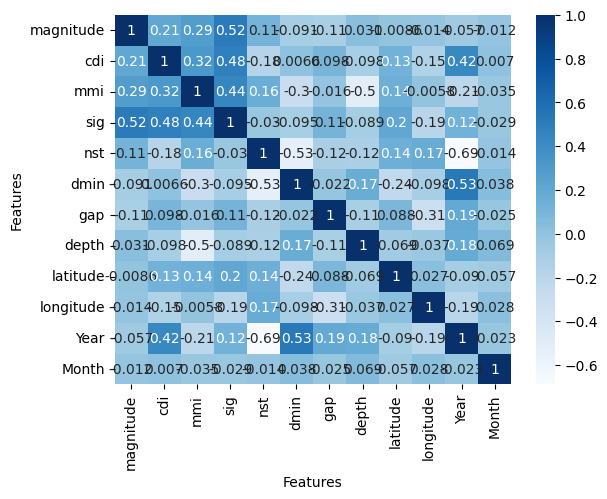

In [4]:
# Making features and target
features = data.drop('tsunami', axis=1)
target = data['tsunami']
# Correlation between features
corr = features.corr()
# Display the correlation matrix
sns.heatmap(corr, annot=True, cmap='Blues')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [5]:
# Sandardizing the data
scaler = StandardScaler()
features = scaler.fit_transform(features)
features

array([[ 0.13223459,  1.15730518,  0.70858793, ...,  0.90802616,
         1.59460058,  1.26541326],
       [-0.0923689 , -0.10535635, -1.34369267, ...,  0.40848226,
         1.59460058,  1.26541326],
       [ 0.13223459, -0.42102173, -2.0277862 , ..., -1.96017977,
         1.59460058,  1.26541326],
       ...,
       [ 0.35683808, -1.36801788,  0.70858793, ...,  0.97230876,
        -1.85054226, -1.58714705],
       [-0.31697239, -1.36801788, -0.65959913, ...,  0.6305178 ,
        -1.85054226, -1.58714705],
       [ 1.25525204, -1.36801788,  0.70858793, ...,  0.62780187,
        -1.85054226, -1.58714705]], shape=(782, 12))

Training Random Forest
Accuracy: 0.9235668789808917
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93        91
           1       0.86      0.98      0.92        66

    accuracy                           0.92       157
   macro avg       0.92      0.93      0.92       157
weighted avg       0.93      0.92      0.92       157

Confusion Matrix:



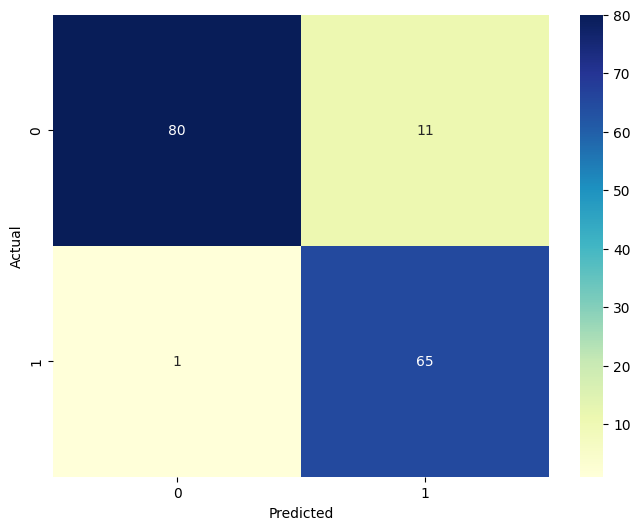

Training Logistic Regression
Accuracy: 0.8471337579617835
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        91
           1       0.78      0.88      0.83        66

    accuracy                           0.85       157
   macro avg       0.84      0.85      0.85       157
weighted avg       0.85      0.85      0.85       157

Confusion Matrix:



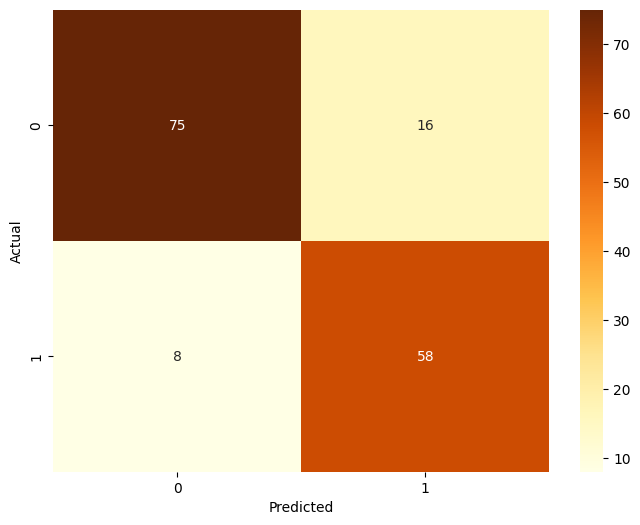

In [6]:
# Binary Classification
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
# Models Dictionary
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(solver='liblinear')
}
colors = {
    'Random Forest': 'YlGnBu',
    'Logistic Regression': 'YlOrBr'
}

for modelname, model in models.items():
    print(f'Training {modelname}')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')

    # Classification Report
    report = classification_report(y_test, y_pred)
    print(f'Classification Report:\n{report}')
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix:\n')
    fig, ax = plt.subplots(figsize=(8, 6))
    # change the color of the heatmap
    sns.heatmap(cm, annot=True, cmap=colors[modelname])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
